# Estimator API: Einfache lineare Regression (supervised)

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()

## 0. Generiere Daten
Wir generieren 50 zufällige Datenpunkte zwischen 0 und 10, die **ungefähr** auf der Geraden $y=2x-1$ liegen.

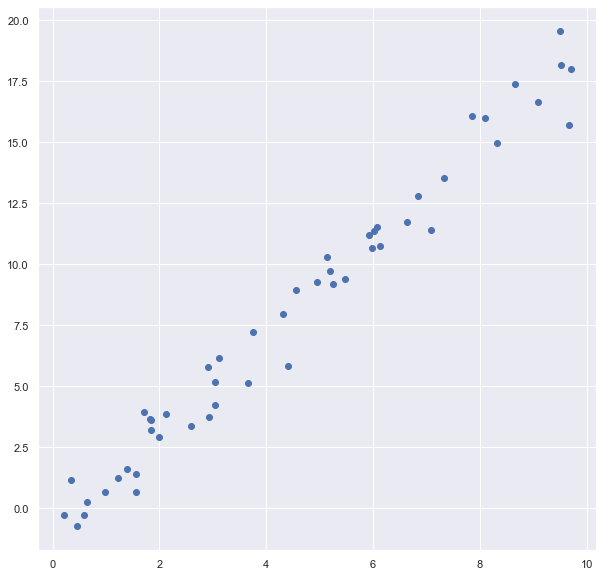

In [4]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)              # Erzeuge 50 zufällige x-Werte zwischen 0 und 10
y = 2 * x - 1 + rng.randn(50)      # Erzeuge die y-Werte: y = 2x-1 + zufälliges Rauschen
plt.figure(figsize=(10,10))
plt.scatter(x, y);

## 1. Wähle Modellklasse

In [5]:
from sklearn.linear_model import LinearRegression

## 2. Wähle Modellparameter
Alle Modelle sind ausführlich dokumentiert. Diese kann online eingesehen werden ("sklearn Linearregression") oder durch ein `?` aufgerufen werden.

In [6]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an estimator wi

In [7]:
model = LinearRegression(fit_intercept=True)

Bis hier ist noch nichts wesentliches passiert - es wurde nur das Modell angelegt, aber noch nicht auf die Daten angepasst.

## 3. Bereite Daten vor

In [8]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [9]:
y

array([ 7.22926896, 18.18565441, 13.52423055, 10.67206599,  0.64185082,
        1.4000462 , -0.29896653, 17.38064514, 11.36591852, 11.3984114 ,
       -0.26422614, 18.01311476, 14.97193082,  3.8584585 ,  3.66749887,
        3.59937032,  4.24562734,  9.18591626,  7.9701638 ,  5.80012793,
       10.75788366,  1.60421824,  3.736558  ,  5.13103024,  8.93392551,
       16.05975926,  2.92146552, 10.28822167, 11.2099274 , -0.7161115 ,
       11.51229264,  3.94851904,  0.26520582, 19.5423544 , 15.69289556,
       15.98984947,  5.17932245,  0.65443493, 12.77642131,  5.81548096,
        1.22109281,  9.26065077,  1.16566447, 16.66813782,  3.36710603,
       11.74868864,  6.14962364,  9.73011153,  9.40444538,  3.21035654])

x ist noch ein Vektor. Wir brauchen aber eine *Features Matrix* der Form `[n_samples, n_features]`.

In [10]:
X = x[:, np.newaxis]

In [11]:
X.shape

(50, 1)

In [12]:
y.shape

(50,)

## 4. Passe das Modell an die Daten an

In [13]:
model.fit(X,y)

LinearRegression()

Was ist jetzt passiert?
Durch modellspezifische Berechnungen wurden modellspezifische Parameter bestimmt; das ist die eigentliche Arbeit.
Hier:
- Berechnung: Löse Normalengleichung
- Ergebnis: Parameter der (affin)linearen Funktion; diese heißen `coef_` und `intercept_`

In [14]:
model.coef_

array([1.9776566])

In [15]:
model.intercept_

-0.9033107255311164

Das passt recht gut zu den Daten, die ja gemäß $y=2x-1$ erzeugt wurden und dann ein wenig verrauscht wurden.

## 5. Wende das Modell auf neue Daten an

In unserem *superviseden* Fall heißt das: Vorhersage eines Labels für unbekannte Daten (hier: x-Werte).

Erzeuge neue x-Daten:

In [16]:
xfit = np.linspace(-1,11, num=10)     # Erzeugt 10 gleich äquidistante Punkte zwischen -1 und 11
Xfit = xfit[:, np.newaxis]    # Wandle Array in Matrix um

Nun wird das Modell aktiv: Es berechnet für jeden dieser 10 neuen x-Werte "seine Vorhersage" eines y-Werts:

In [17]:
yfit = model.predict(Xfit)

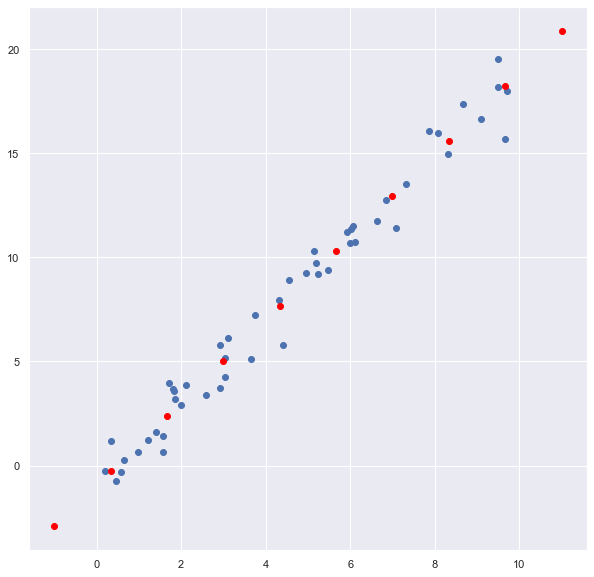

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.scatter(xfit, yfit, color='red');
#plt.plot(xfit, yfit);